In [ ]:
#Car information
#visualization of Dataset.
#DATA = https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset
#please note analysis would not be accurate as dataset is inconsitent. This is merely for visualization purposes.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [9]:
# Load the CSV file
file_path = r'C:\Users\T blqck\projects\automobile.csv'
data = pd.read_csv(file_path)

# Preview the columns
print(data.head())

# Display the column names
print(data.columns)


                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  
Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')


In [ ]:
# the scatter plot matrix is a powerful visualization tool that helps you gain a comprehensive understanding of the relationships and distributions of multiple variables simultaneously.

In [ ]:
#let's get a bird's eye view of what we are getting into

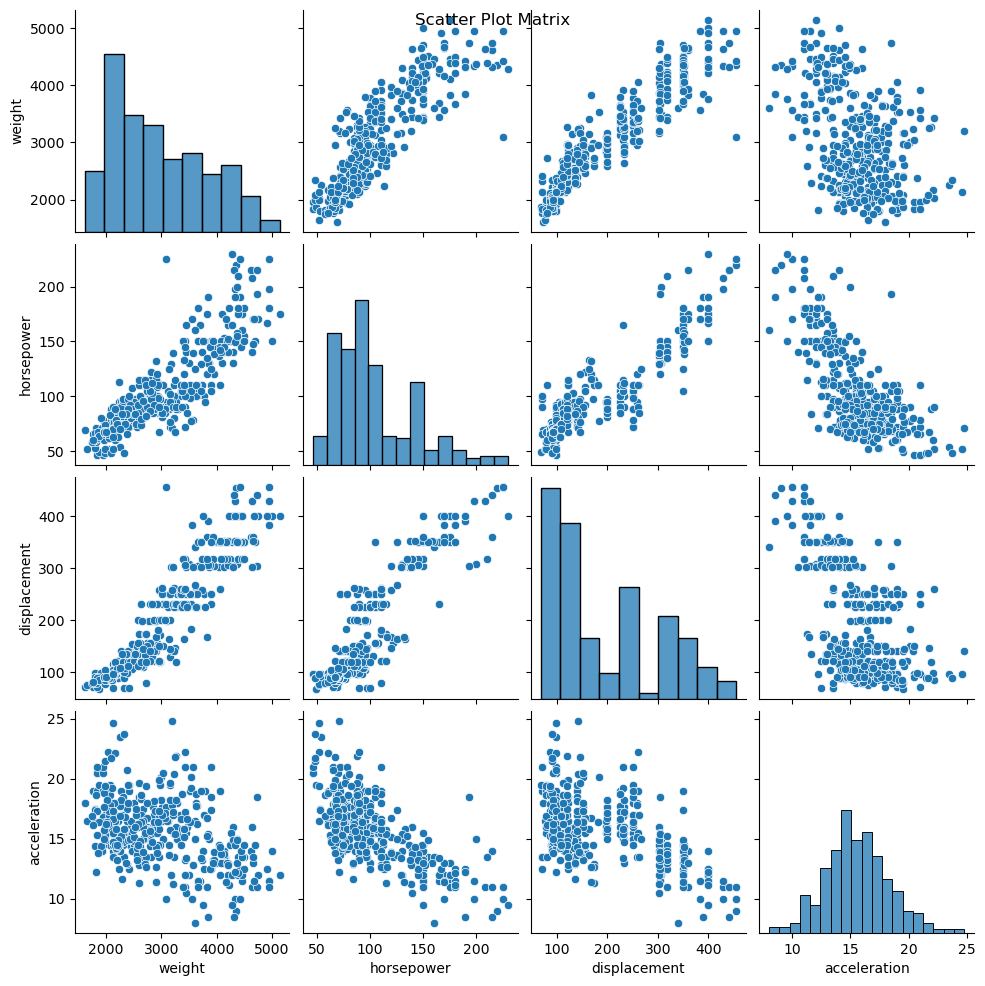

In [44]:
# Selecting variables for the scatter plot matrix
variables = ['weight', 'horsepower', 'displacement', 'acceleration']

# Creating the scatter plot matrix
sns.pairplot(data[variables])
plt.suptitle('Scatter Plot Matrix')
plt.show()

In [ ]:
# I want to look at Fuel Efficiency Trend over Time, just to see what the industry has been doing in this sector over the years.

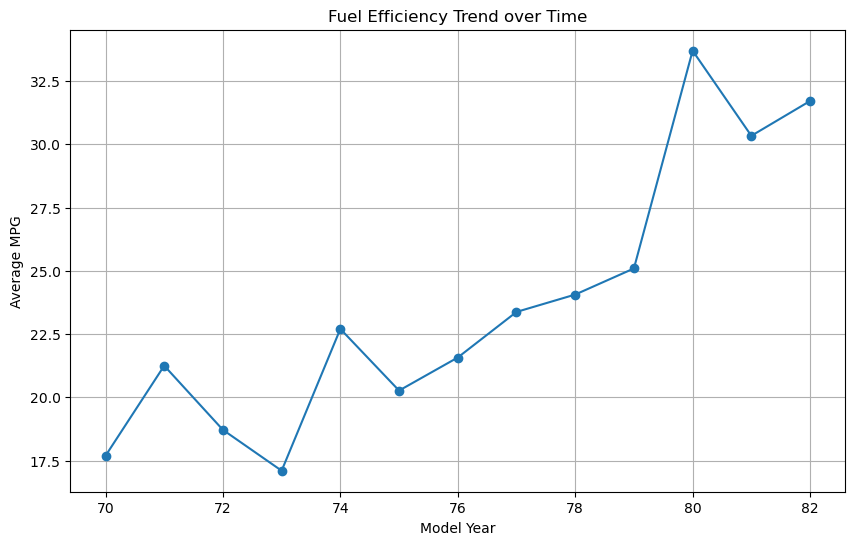

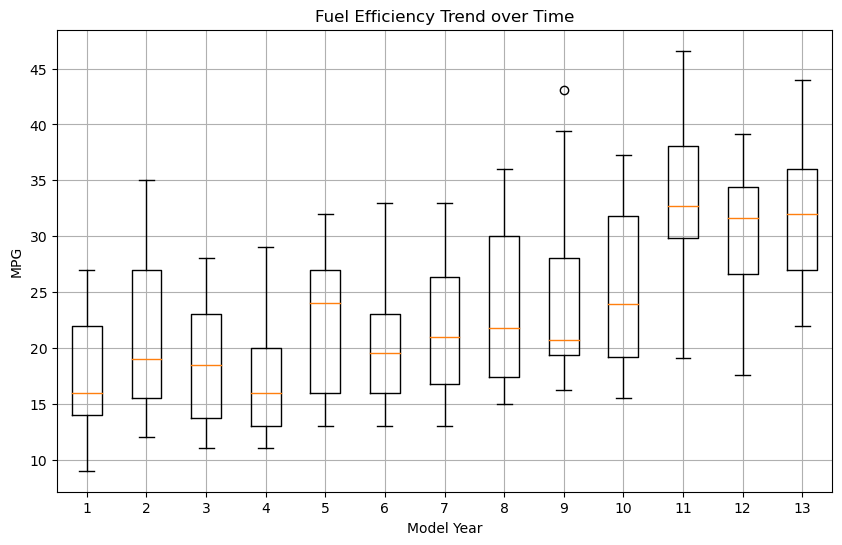

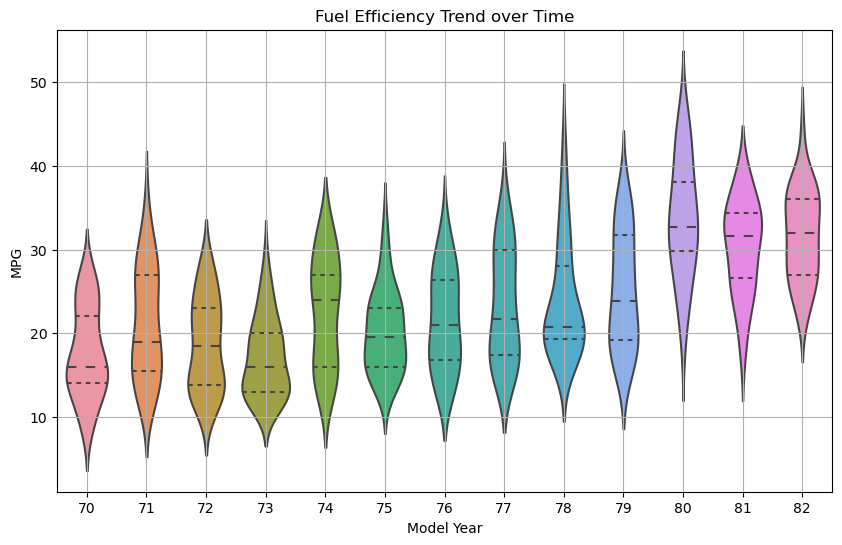

In [18]:
# Calculate average MPG by model year
avg_mpg_by_year = data.groupby('model_year')['mpg'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_mpg_by_year.index, avg_mpg_by_year.values, marker='o')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.title('Fuel Efficiency Trend over Time')
plt.grid(True)
plt.show()




# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data.groupby('model_year')['mpg'].apply(list))
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Fuel Efficiency Trend over Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x=data['model_year'], y=data['mpg'], inner='quartile')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Fuel Efficiency Trend over Time')
plt.grid(True)
plt.show()

In [ ]:
#pretty intresting I have a suspision the Fuel Efficiency Trend over Time especially in 80 had something to do with the weight.

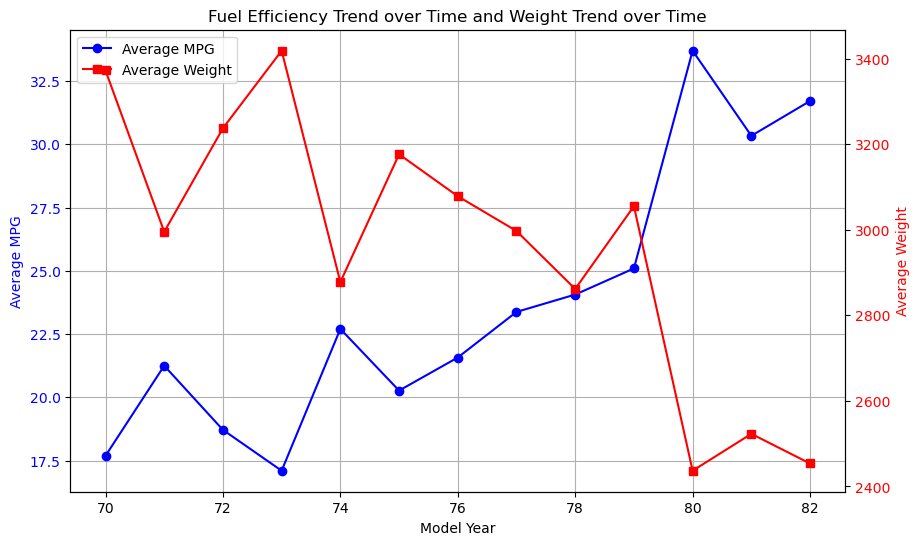

In [17]:
# Calculate average MPG and weight by model year
avg_mpg_by_year = data.groupby('model_year')['mpg'].mean()
avg_weight_by_year = data.groupby('model_year')['weight'].mean()

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot fuel efficiency trend
ax1.plot(avg_mpg_by_year.index, avg_mpg_by_year.values, marker='o', color='blue')
ax1.set_xlabel('Model Year')
ax1.set_ylabel('Average MPG', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot weight trend
ax2.plot(avg_weight_by_year.index, avg_weight_by_year.values, marker='s', color='red')
ax2.set_ylabel('Average Weight', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend
lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, ['Average MPG', 'Average Weight'], loc='best')

# Set the title
plt.title('Fuel Efficiency Trend over Time and Weight Trend over Time')

# Show the plot
plt.show()





In [ ]:
#as I supected the drop in weight in '80' corroleted perfectly with high fuel efficency.
#however does this conclued that light cars means efficency in fuel?
#

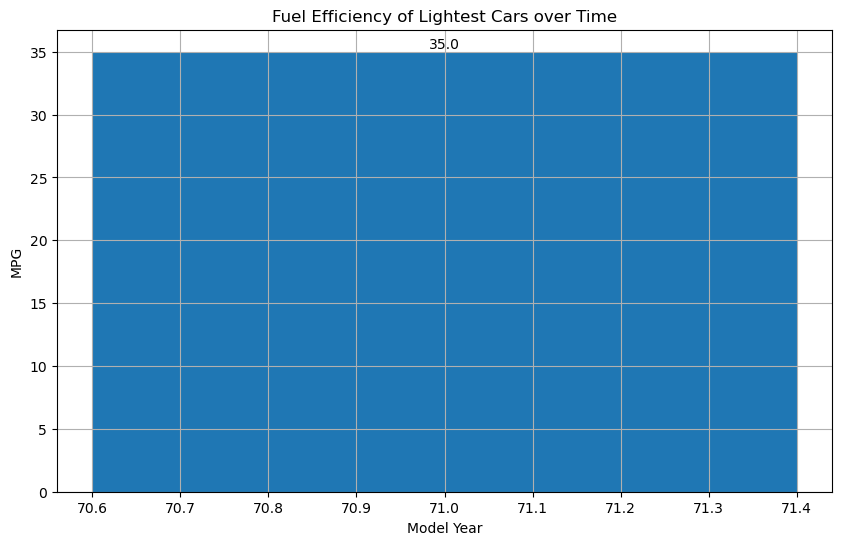

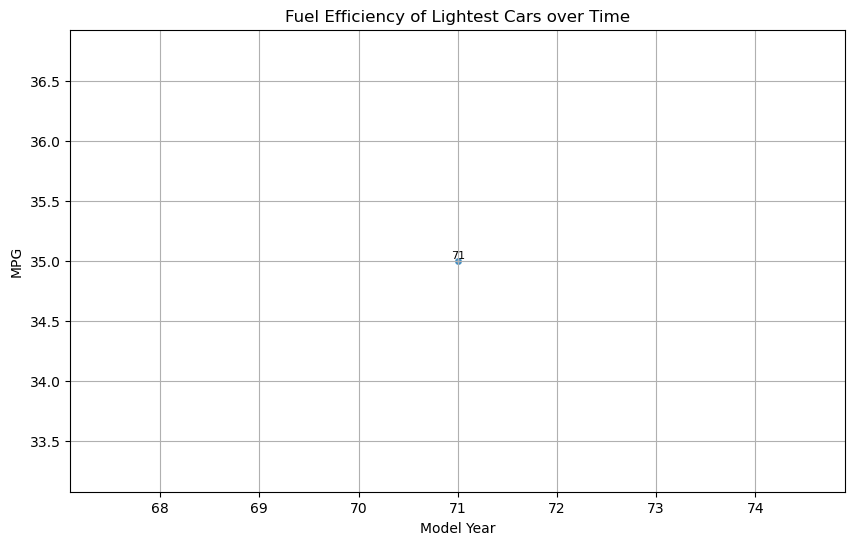

In [22]:
# Find the lightest cars
lightest_cars = data.loc[data['weight'] == data['weight'].min()]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(lightest_cars['model_year'], lightest_cars['mpg'])
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Fuel Efficiency of Lightest Cars over Time')
plt.grid(True)

# Add data labels on top of each bar
for i in range(len(lightest_cars)):
    plt.text(lightest_cars.iloc[i]['model_year'], lightest_cars.iloc[i]['mpg'], lightest_cars.iloc[i]['mpg'],
             ha='center', va='bottom')

plt.show()


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(lightest_cars['model_year'], lightest_cars['mpg'], s=lightest_cars['weight']/100, alpha=0.7)
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Fuel Efficiency of Lightest Cars over Time')
plt.grid(True)

# Add text labels for each data point
for i in range(len(lightest_cars)):
    plt.text(lightest_cars.iloc[i]['model_year'], lightest_cars.iloc[i]['mpg'], lightest_cars.iloc[i]['model_year'],
             ha='center', va='bottom', fontsize=8, color='black')

plt.show()

In [ ]:
#I think the scatter plot gives a perfect visual of how light cars fuel economy fare.
# Lets get visuals for the heaviest cars produced and their fuel economy.


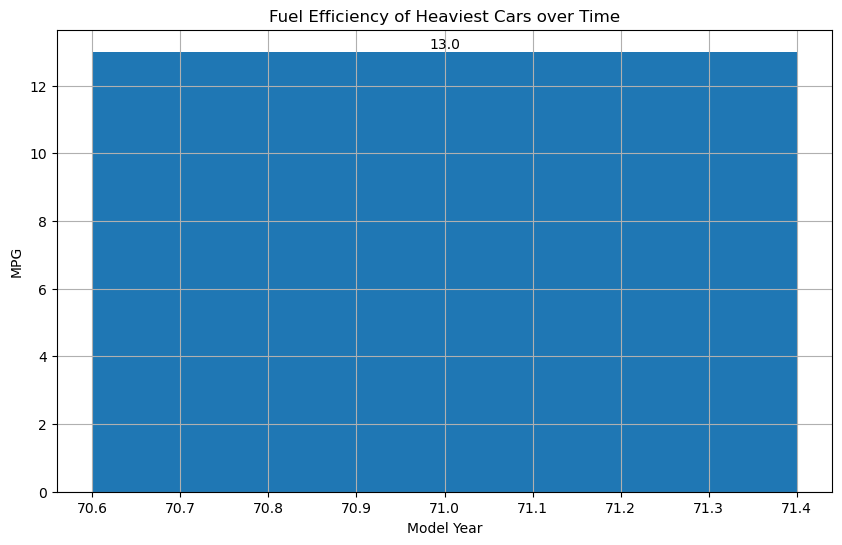

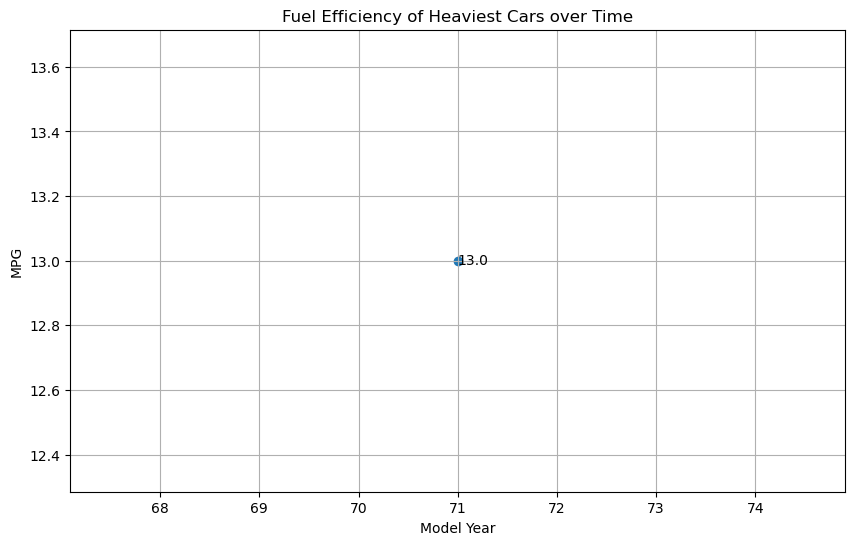

In [46]:
# Find the heaviest cars
heaviest_cars = data.loc[data['weight'] == data['weight'].max()]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(heaviest_cars['model_year'], heaviest_cars['mpg'])
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Fuel Efficiency of Heaviest Cars over Time')
plt.grid(True)

# Add data labels on top of each bar
for i in range(len(heaviest_cars)):
    plt.text(heaviest_cars.iloc[i]['model_year'], heaviest_cars.iloc[i]['mpg'], heaviest_cars.iloc[i]['mpg'],
             ha='center', va='bottom')

plt.show()


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(heaviest_cars['model_year'], heaviest_cars['mpg'])
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Fuel Efficiency of Heaviest Cars over Time')
plt.grid(True)

# Add data labels next to each data point
for i in range(len(heaviest_cars)):
    plt.text(heaviest_cars.iloc[i]['model_year'], heaviest_cars.iloc[i]['mpg'], heaviest_cars.iloc[i]['mpg'],
             ha='left', va='center')

plt.show()

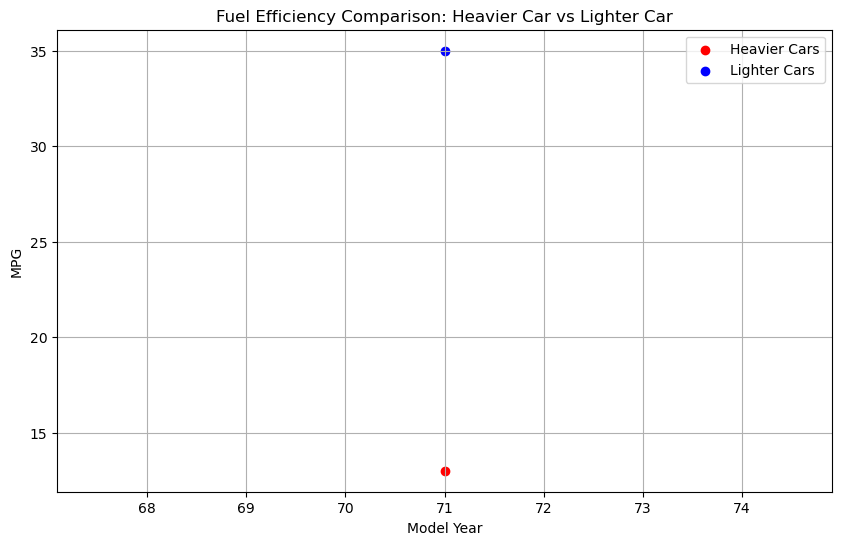

Heaviest Car Details:
                   name   mpg  cylinders  displacement  horsepower  weight  \
44  pontiac safari (sw)  13.0          8         400.0       175.0    5140   

    acceleration  model_year origin  
44          12.0          71    usa  

Lightest Car Details:
           name   mpg  cylinders  displacement  horsepower  weight  \
54  datsun 1200  35.0          4          72.0        69.0    1613   

    acceleration  model_year origin  
54          18.0          71  japan  


In [30]:




# Find the heaviest and lightest cars
heaviest_cars = data.loc[data['weight'] == data['weight'].max()]
lightest_cars = data.loc[data['weight'] == data['weight'].min()]

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot heavier cars in red
plt.scatter(heaviest_cars['model_year'], heaviest_cars['mpg'], color='red', label='Heavier Cars')

# Plot lighter cars in blue
plt.scatter(lightest_cars['model_year'], lightest_cars['mpg'], color='blue', label='Lighter Cars')

plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Fuel Efficiency Comparison: Heavier Car vs Lighter Car')
plt.grid(True)
plt.legend()

plt.show()

# Print details of the heaviest car
print("Heaviest Car Details:")
print(heaviest_cars)

# Print details of the lightest car
print("\nLightest Car Details:")
print(lightest_cars)


In [ ]:
# in the visualization above we combine a scatter plot of both heavier cars and light one to se how the fair against each other.
#and also give more context to the visuals.

In [ ]:
#LET'S TRY Engine Displacement vs. Horsepower MAYBE this visualization can help identify any relationships or patterns between engine displacement and horsepower.

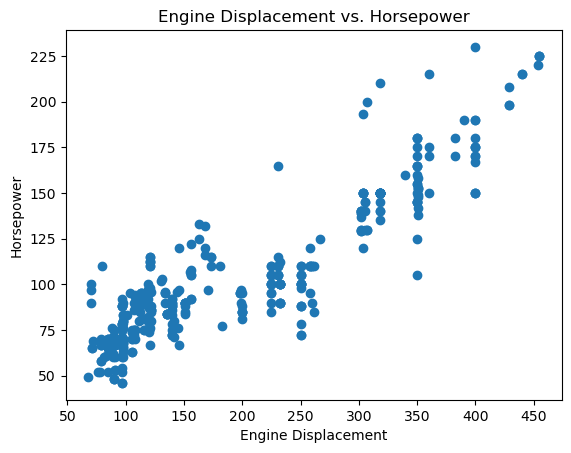

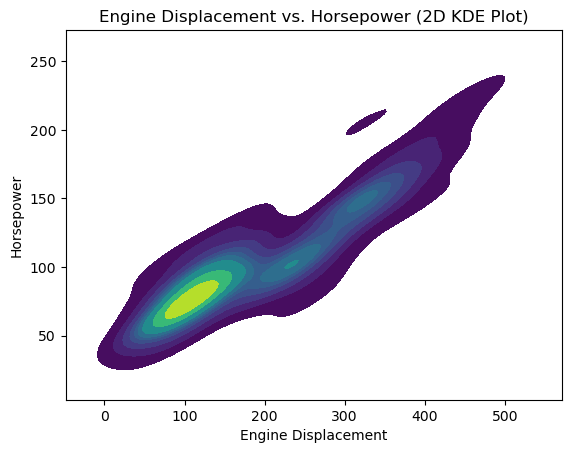

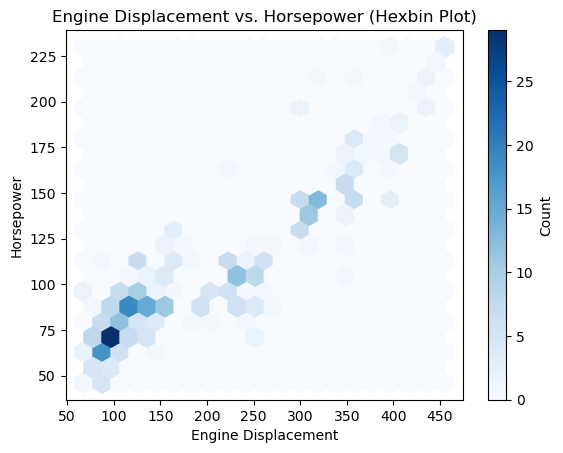

In [59]:
# Scatter plot: Engine Displacement vs. Horsepower
plt.scatter(data['displacement'], data['horsepower'])
plt.xlabel('Engine Displacement')
plt.ylabel('Horsepower')
plt.title('Engine Displacement vs. Horsepower')
plt.show()

# 2D KDE Plot: Engine Displacement vs. Horsepower
sns.kdeplot(data=data, x='displacement', y='horsepower', shade=True, cmap='viridis')
plt.xlabel('Engine Displacement')
plt.ylabel('Horsepower')
plt.title('Engine Displacement vs. Horsepower (2D KDE Plot)')
plt.show()

# Hexbin Plot: Engine Displacement vs. Horsepower
plt.hexbin(data['displacement'], data['horsepower'], gridsize=20, cmap='Blues')
plt.xlabel('Engine Displacement')
plt.ylabel('Horsepower')
plt.title('Engine Displacement vs. Horsepower (Hexbin Plot)')
plt.colorbar(label='Count')
plt.show()

In [ ]:
#The visualization of engine displacement versus horsepower reveals an interesting pattern. The highest recorded horsepower in the dataset appears to be around 250, and it coincides with the highest recorded engine displacement, which is approximately 450.

#This observation suggests that there may be a relationship between engine displacement and horsepower, particularly in the context of high-performance vehicles. Typically, larger engine displacements are associated with higher power outputs, which can result in higher horsepower ratings.

#The data points clustered around the highest values of engine displacement and horsepower likely represent high-performance or high-displacement vehicles. These vehicles are expected to deliver greater power and performance due to their larger engine sizes.

In [ ]:
#Let's do a Temporal Analysis: To analyze how the relationship between horsepower and engine displacement has changed over time

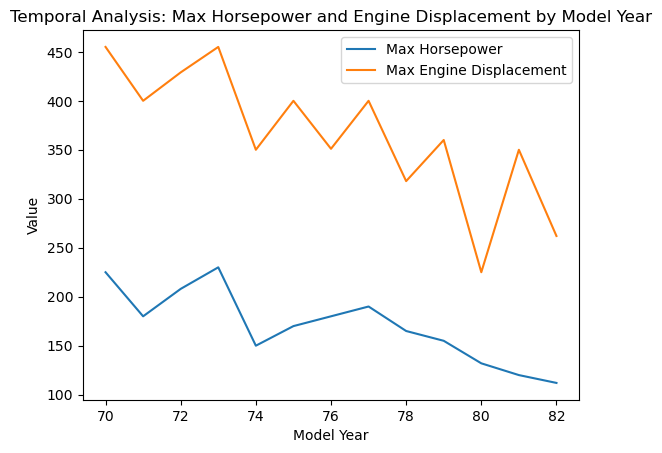

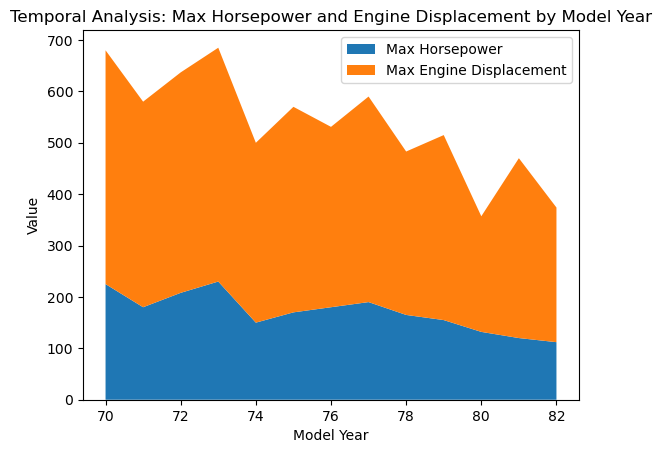

In [40]:
# Group the data by model year and find the maximum values for horsepower and engine displacement
max_horsepower_by_year = data.groupby('model_year')['horsepower'].max()
max_engine_displacement_by_year = data.groupby('model_year')['displacement'].max()

# Plot the temporal analysis
plt.plot(max_horsepower_by_year.index, max_horsepower_by_year, label='Max Horsepower')
plt.plot(max_engine_displacement_by_year.index, max_engine_displacement_by_year, label='Max Engine Displacement')

plt.xlabel('Model Year')
plt.ylabel('Value')
plt.title('Temporal Analysis: Max Horsepower and Engine Displacement by Model Year')
plt.legend()
plt.show()


# Area plot for temporal analysis
plt.stackplot(max_horsepower_by_year.index, max_horsepower_by_year, max_engine_displacement_by_year, labels=['Max Horsepower', 'Max Engine Displacement'])
plt.xlabel('Model Year')
plt.ylabel('Value')
plt.title('Temporal Analysis: Max Horsepower and Engine Displacement by Model Year')
plt.legend()
plt.show()


In [ ]:
#The temporal analysis of maximum horsepower and engine displacement by model year reveals an interesting trend. From the plotted data, it appears that both maximum horsepower and engine displacement reached their peak values prior to the year 19743. After 1974, there is a downward trend, suggesting a decline in the highest recorded values for both horsepower and engine displacement.

In [ ]:
#now lets do an Acceleration by Origin: Create a plot to compare the acceleration of cars based on their country of origin (e.g., USA, Europe, Japan). This analysis can reveal any differences in acceleration performance among different regions.

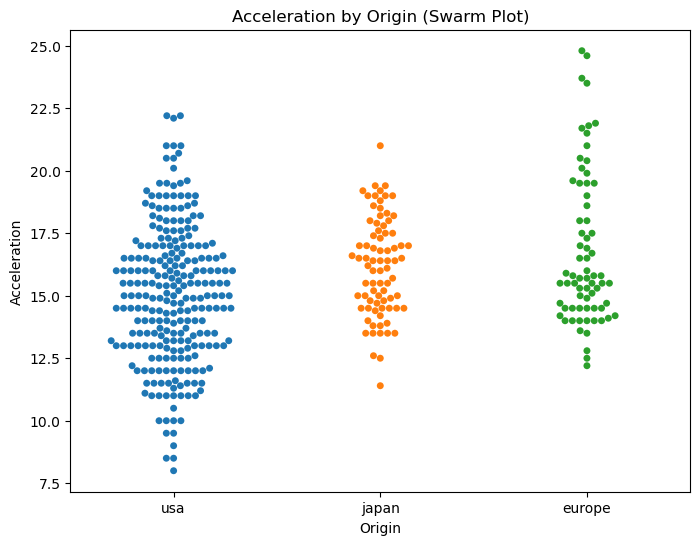

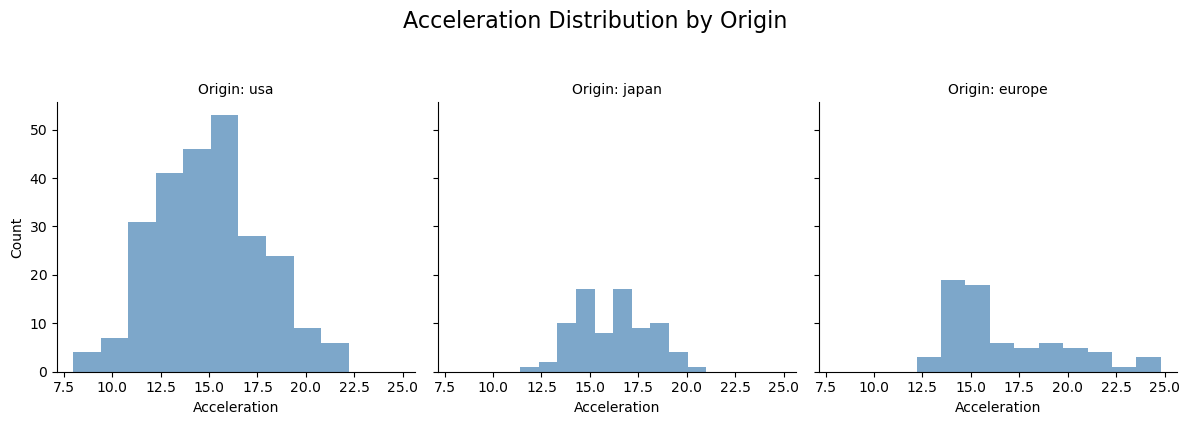

In [51]:
# Swarm Plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='origin', y='acceleration', data=data)
plt.xlabel('Origin')
plt.ylabel('Acceleration')
plt.title('Acceleration by Origin (Swarm Plot)')
plt.show()

# Facet Grid of Histograms
g = sns.FacetGrid(data, col='origin', height=4)
g.map(plt.hist, 'acceleration', bins=10, color='steelblue', alpha=0.7)
g.set_axis_labels('Acceleration', 'Count')
g.set_titles('Origin: {col_name}')
plt.suptitle('Acceleration Distribution by Origin', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#Based on the analysis of the dataset, it was found that cars from the USA exhibit the highest acceleration, followed by cars from Europe and then Japan. This suggests a trend of varying acceleration performance among different regions.